### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad(y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
lista_alumnos = [("Clara Piniella", 30, 1.66), ("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78), ("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez", 28, 1.81),("Javier Araiz Miranda", 30, 1.80)]

In [27]:
X = []
y = []

for tupla in lista_alumnos:
    X.append(tupla[2])
    y.append(tupla[1])


In [28]:
X = np.array(X)
X = X.reshape(-1, 1)

In [29]:
y = np.array(y)

No, porque no existe ningún tipo de correlación entre la edad y la altura.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [32]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_test_predict = lin_reg.predict(X_test)
y_test_predict

array([31.88373285, 29.4886553 , 31.48455326, 32.68209204, 31.48455326])

In [34]:
y_test

array([28, 57, 47, 34, 31])

[13.30598641]


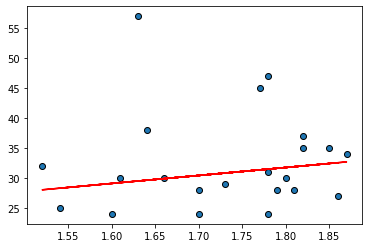

In [35]:
plt.scatter(X, y, edgecolor='black')
plt.plot(X, lin_reg.predict(X), color='r')
print(lin_reg.coef_)

In [36]:
errores = []
for pos, x in enumerate(y_test_predict):
    errores.append(x - y_test[pos])

In [37]:
errores

[3.8837328547622114,
 -27.51134469939751,
 -15.515446737597742,
 -1.3179079605178856,
 0.48455326240225816]

In [38]:
from sklearn import metrics

In [39]:
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

MSE: 202.9316457559921
RMSE: 14.245407883103667


¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema? NO 

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(X, y)

In [42]:
df.reset_index(inplace=True)

In [43]:
df

,index,0
0,30,1.66
1,34,1.87
2,31,1.78
3,24,1.60
4,28,1.79
5,27,1.86
6,25,1.54
7,30,1.61
8,32,1.52
9,37,1.82


In [44]:
df.rename(columns={"index" : "edad", 0:"altura"}, inplace=True)

In [45]:
df

,edad,altura
0,30,1.66
1,34,1.87
2,31,1.78
3,24,1.60
4,28,1.79
5,27,1.86
6,25,1.54
7,30,1.61
8,32,1.52
9,37,1.82


<AxesSubplot:>

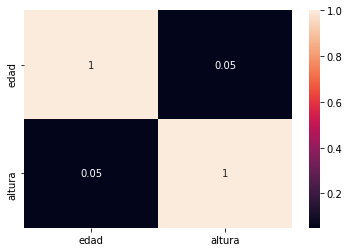

In [46]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

No existe correlación

[6.65299321]
MSE: 202.9316457559921
RMSE: 14.245407883103667


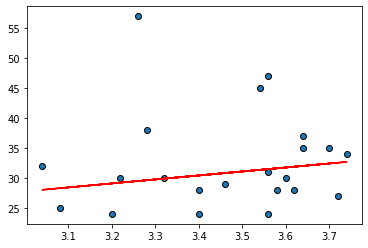

In [47]:
X = []
y = []

for tupla in lista_alumnos:
    X.append(2*tupla[2])
    y.append(tupla[1])

X = np.array(X)
X = X.reshape(-1, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

plt.scatter(X, y, edgecolor='black')
plt.plot(X, lin_reg.predict(X), color='r')
print(lin_reg.coef_)
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[26.61197282]
MSE: 2762.0979834050113
RMSE: 52.55566556904223


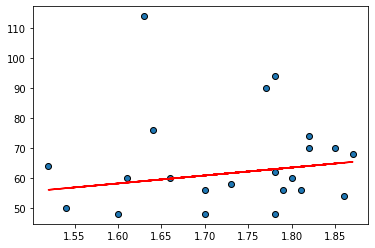

In [48]:
X = []
y = []

for tupla in lista_alumnos:
    X.append(tupla[2])
    y.append(2*tupla[1])

X = np.array(X)
X = X.reshape(-1, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

plt.scatter(X, y, edgecolor='black')
plt.plot(X, lin_reg.predict(X), color='r')
print(lin_reg.coef_)
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

La pendiente aunque parezcan aparentemente iguales, al sacar el coeficiente vemos que la pendiente es diferente, si cambiamos el eje y se duplica y si cambiamos el eje x se reduce a la mitad